In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Least-square fit using scifi optimise

1) Print the mock data in a datafile

2) Fit it with least-squares



In [2]:
# This is the (mock) data 
m_fake = 14
b_fake = -4
npoint = 200
#####
x_fake = np.random.uniform(0.0, 1.5, npoint) 
gaussian_noise = np.random.normal(0.0, 1.5, npoint) 
y_fake = m_fake* x_fake + b_fake
y_fake = y_fake + gaussian_noise
error_bars_fake =np.abs(np.random.normal(0,1.0, npoint))
### Print to a data file
text_file_columns = np.column_stack((x_fake, y_fake, error_bars_fake))
np.savetxt('mock_data.txt', text_file_columns, fmt="%f\t%f\t%f")

In [3]:
columns = ["x_fake", "y_fake", "error_bars_fake"]
mock_datafile = pd.read_csv("mock_data.txt", delimiter = "\t", names = columns)
x_fake = mock_datafile["x_fake"].values 
y_fake = mock_datafile["y_fake"].values
error_bars_fake = mock_datafile["error_bars_fake"].values
x_fake

array([0.27358 , 0.76267 , 1.072225, 0.871862, 1.255543, 0.383032,
       0.80475 , 0.162767, 1.306307, 1.099923, 1.33776 , 0.913578,
       0.129611, 1.150814, 0.02786 , 1.333545, 1.400884, 0.478057,
       0.119828, 1.466564, 0.67301 , 0.016418, 1.360904, 0.912002,
       0.248804, 0.305182, 0.860307, 1.154085, 0.955086, 1.053273,
       0.022836, 1.25821 , 0.848111, 1.027297, 1.10365 , 0.492057,
       0.82578 , 0.100587, 0.65786 , 1.409591, 0.31379 , 0.360869,
       1.392648, 1.370281, 0.835978, 1.220217, 0.753751, 1.400431,
       1.006834, 0.169621, 1.43627 , 1.215574, 0.092301, 0.270056,
       1.25372 , 0.608102, 0.048175, 0.599107, 0.967014, 1.462959,
       1.10017 , 0.931548, 0.964228, 0.683436, 0.874406, 0.19057 ,
       0.105616, 1.040144, 1.042258, 0.460723, 0.261688, 1.209485,
       1.469533, 0.651383, 0.359199, 1.439433, 1.453328, 0.66486 ,
       0.490275, 1.336692, 1.151068, 1.221671, 1.442536, 0.058077,
       0.398436, 0.732722, 1.298721, 1.132853, 1.123052, 0.893

In [4]:
# Define a function to work as the model to be fitted
def func(x, m, b):
    return m*x + b

In [5]:
# Doing a least-square fit
# Give initial values
x0   = np.array([0.0, 0.0])
# Call the curve_fit function from 
our_fit = curve_fit(func,x_fake , y_fake, x0, error_bars_fake)
our_fit

(array([14.04820538, -3.87496105]), array([[ 0.04577928, -0.04314391],
        [-0.04314391,  0.04552197]]))

In [6]:
#The values for **m** and **b**
m_fit = our_fit[0][0]
b_fit = our_fit[0][1]

#The other values can be used to determine the uncertainties in the data

error_00 = our_fit[1][0][0]
error_01 = our_fit[1][0][1]
error_10 = our_fit[1][1][0]
error_11 = our_fit[1][1][1]


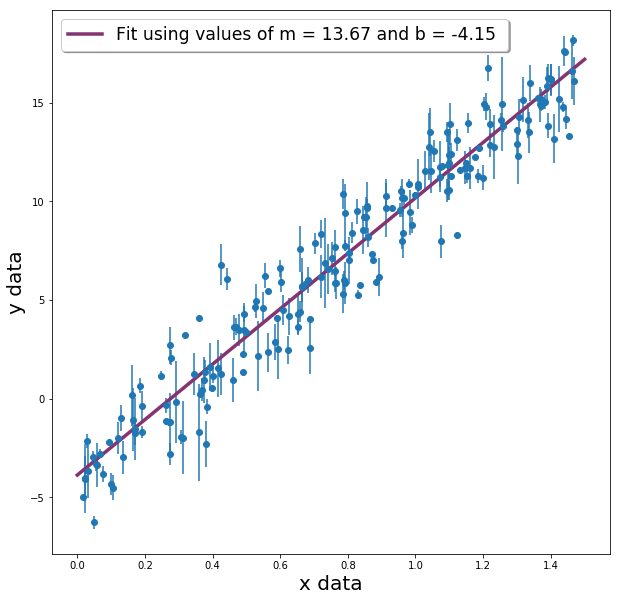

In [7]:
plt.figure(figsize=(10,10))
plt.errorbar(x_fake,y_fake, yerr = error_bars_fake, linestyle = "None", marker = "o")
x_fit = np.linspace(0,1.5)
y =func(x_fit, m_fit, b_fit)
plt. plot(x_fit, y, '-', linewidth = 3.5 , color = "#833471", label = "Fit using values of m = 13.67 and b = -4.15 ")
plt.xlabel("x data", size = 20)
plt.ylabel("y data", size= 20)
plt.legend(loc='upper left',shadow=True, fontsize = "xx-large" )

In [8]:
# Adding uncertainties coloured in orange

nume = 10000
mc_errors = np.zeros((nume,x_fit.size))

for i in np.arange(10000):
    a_i = np.random.normal(m_fit ,np.sqrt(our_fit[1][0][0])) 
    b_i = np.random.normal(b_fit ,np.sqrt(our_fit[1][1][1]))
    mc_errors[i] = func(x_fit, a_i,b_i)

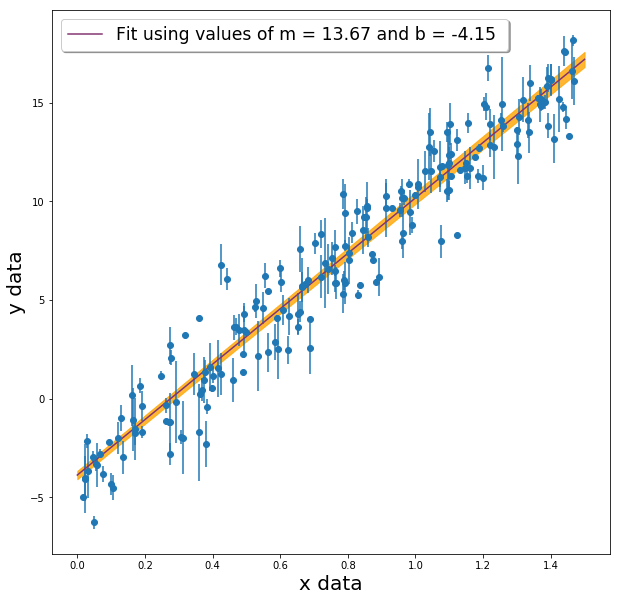

In [9]:
plt.figure(figsize=(10,10))
plt.errorbar(x_fake,y_fake, yerr = error_bars_fake, linestyle = "None", marker = "o")
x_fit = np.linspace(0,1.5)
y =func(x_fit, m_fit, b_fit)
plt. plot(x_fit, y, '-', linewidth = 1.5 , color = "#833471", label = "Fit using values of m = 13.67 and b = -4.15 ")
plt.xlabel("x data", size = 20)
plt.ylabel("y data", size= 20)
plt.legend(loc='upper left',shadow=True, fontsize = "xx-large" )
####
plt.fill_between(x_fit,mc_errors.mean(axis=0)-mc_errors.std(axis=0),
                mc_errors.mean(axis=0)+mc_errors.std(axis=0),alpha=0.8,color='orange')
####